# Sheet 5
Nombres:
Mariana Ramirez Gomez,
Felipe Mendoza Navarrete,
Sofía Macias Pérez

## Exercise 1
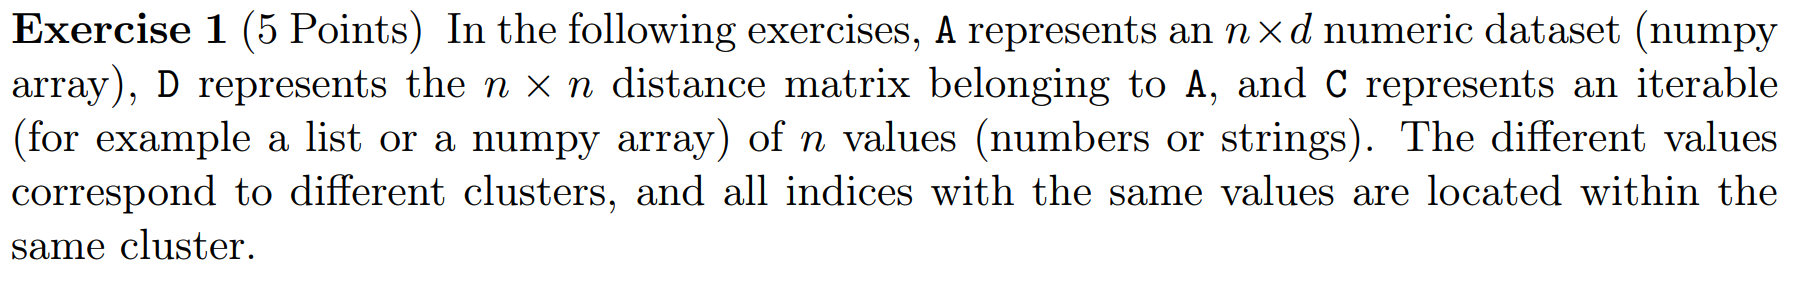

### 1.1
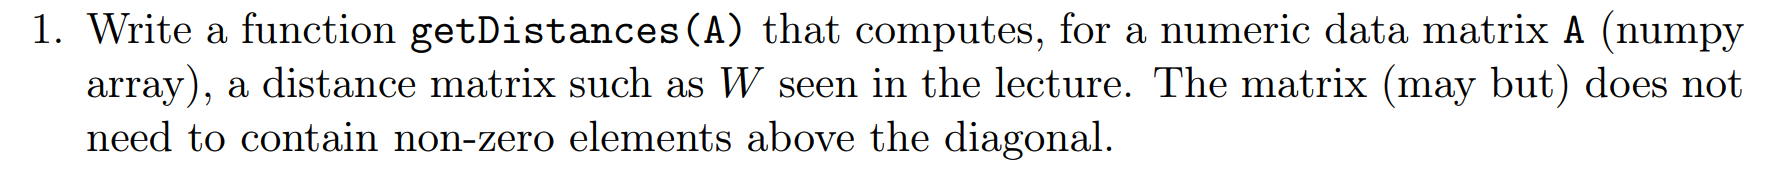

In [1]:
import numpy as np

def getDistances(A):
    # Find shape distance matrix
    n = A.shape[0]
    D = np.zeros((n, n))
    
    # Fill distance matrix
    for i in range(n):
        for j in range(i + 1, n):
            distance = np.linalg.norm(A[i] - A[j]) #Euclidean distance
            D[i, j] = distance
            D[j, i] = distance #The matrix is symmetric

    return D


### 1.2
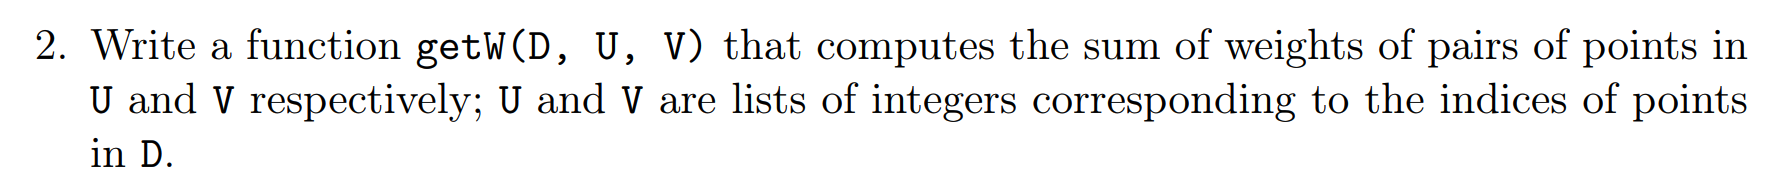

In [2]:
def getW(D,U,V):
    sumWeightsPairs = 0
    for i in U:
        for j in V:
            sumWeightsPairs += D[i,j]

    return sumWeightsPairs


### 1.3
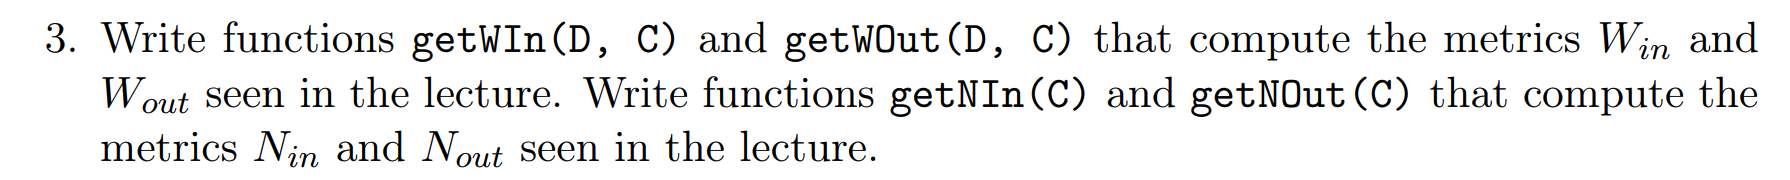

In [3]:

def get_Win(D, C):
    n = len(C)  # Number of data points
    unique_clusters = np.unique(C)  # Get unique cluster labels

    Win = 0.0

    for cluster_label in unique_clusters:
        # Indices of data points in the current cluster
        cluster_indices = np.where(C == cluster_label)[0]

        # Sum distances within the cluster
        sum_distances_within_cluster = np.sum(D[cluster_indices][:, cluster_indices])

        Win += sum_distances_within_cluster

    return Win



In [4]:

def get_Wout(D, C):
    
    n = len(C)  # Number of data points
    unique_clusters = np.unique(C)  # Get unique cluster labels

    Wout = 0.0

    for cluster_label_i in unique_clusters:
        for cluster_label_j in unique_clusters:
            if cluster_label_i != cluster_label_j:
                # Indices of data points in clusters i and j
                cluster_indices_i = np.where(C == cluster_label_i)[0]
                cluster_indices_j = np.where(C == cluster_label_j)[0]

                # Sum distances between clusters i and j
                sum_distances_between_clusters = np.sum(D[cluster_indices_i][:, cluster_indices_j])

                Wout += sum_distances_between_clusters

    return Wout


In [5]:
def get_Nin(C):
   
    unique_clusters = np.unique(C)  # Get unique cluster labels

    Nin = 0

    for cluster_label in unique_clusters:
        # Count the number of data points in the current cluster
        n_i = np.sum(C == cluster_label)

        # Calculate the binomial coefficient (n_i choose 2)
        num_intracluster_edges = n_i * (n_i - 1) // 2
        Nin += num_intracluster_edges

    return Nin




In [6]:
def get_Nout(C):
    unique_clusters = np.unique(C)  # Get unique cluster labels
    k = len(unique_clusters)  # Total number of clusters

    Nout = 0

    for i in range(k - 1):
        for j in range(i + 1, k):
            # Sizes of clusters i and j
            n_i = np.sum(C == unique_clusters[i])
            n_j = np.sum(C == unique_clusters[j])

            # Add the product of cluster sizes to Nout
            Nout += n_i * n_j

    return Nout



### 1.4
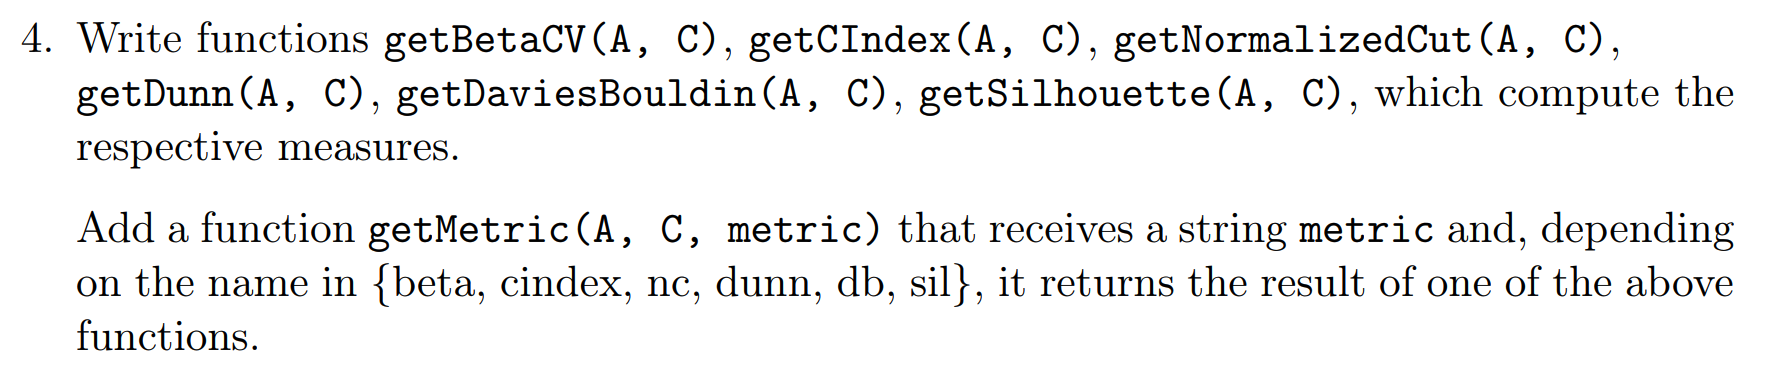

In [7]:
def getBetaCV(A,C):
    D = getDistances(A)
    Win = get_Win(D,C)
    Nin = get_Nin(C)
    Wout =get_Wout(D,C)
    Nout =get_Nout(C)

    beta = (Win/Nin)/(Wout/Nout)
    return beta

In [8]:
def getCIndex(A, C):
    
    D = getDistances(A)
    Win = get_Win(D, C)
    Nin = get_Nin(C)

    # Calculate Wmin(Nin) as the sum of the smallest Nin distances
    sorted_distances = np.sort(D.flatten())
    Wmin_Nin = np.sum(sorted_distances[:Nin])
    Wmax_Nin = np.sum(sorted_distances[-Nin:])

    # Compute the C Index
    CIndex = (Win - Wmin_Nin) / (Wmax_Nin - Wmin_Nin)
    return CIndex

In [9]:
def getSilhouette(A, C):
    D = getDistances(A)
    Win = get_Win(D, C)
    Nin = get_Nin(C)



    # Compute the Silhouette coefficient for each data point
    silhouette_values = []
    for i in range(len(A)):
        mu_in = Win / len(np.where(C == C[i])[0])
        mu_out_min = np.min([np.sum(D[i][C == cluster_label]) for cluster_label in np.unique(C) if cluster_label != C[i]])
        silhouette_i = (mu_out_min - mu_in) / max(mu_out_min, mu_in)
        silhouette_values.append(silhouette_i)

    # Average the Silhouette coefficients across all data points
    silhouette_coefficient = np.mean(silhouette_values)
    return silhouette_coefficient


In [10]:
def getDavisBouldin(A, C):
    clusters = np.unique(C)
    n_clusters = len(clusters)
    
    # Centroids of clusters
    centroids = np.array([A[C == k].mean(axis=0) for k in clusters])
    
    # Step 1: Calculate within-cluster scatter (S_i)
    S = np.zeros(n_clusters)
    for i, k in enumerate(clusters):
        points_in_cluster = A[C == k]
        centroid = centroids[i]
        S[i] = np.mean(np.linalg.norm(points_in_cluster - centroid, axis=1))  # Avg distance to centroid
    
    # Step 2: Calculate between-cluster separation (M_ij)
    M = getDistances(centroids)  # Distance between centroids
    
    # Step 3: Compute the DB Index
    R = np.zeros(n_clusters)
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                ratio = (S[i] + S[j]) / M[i, j]  # Ratio of scatter to separation
                if ratio > max_ratio:
                    max_ratio = ratio
        R[i] = max_ratio
    
    # Step 4: Davis-Bouldin Index is the mean of the maximum R values
    DB_index = np.mean(R)
    return DB_index



In [11]:
def getDunn(A, C):
    
    clusters = np.unique(C)
    
    intra_distances = []
    inter_distances = []
    
    for k in clusters:
        cluster_points = A[C == k]
        if len(cluster_points) > 1:
            intra_distances.append(np.max(getDistances(cluster_points)))
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            points_i = A[C == clusters[i]]
            points_j = A[C == clusters[j]]
            inter_distances.append(np.min(getDistances(np.vstack([points_i, points_j]))))
    
    return np.min(inter_distances) / np.max(intra_distances)

In [12]:

def getNormalizedCut(A, C):
    D = getDistances(A)  # Use the provided getDistances function
    clusters = np.unique(C)
    
    total_cut = 0
    total_assoc = 0
    
    for cluster in clusters:
        # Points in the current cluster
        points_in_cluster = np.where(C == cluster)[0]
        points_outside_cluster = np.where(C != cluster)[0]
        
        # Cut: Sum of distances from points in this cluster to points in other clusters
        cut_cluster = np.sum(D[points_in_cluster][:, points_outside_cluster])
        
        # Association: Sum of distances from points in this cluster to all points
        assoc_cluster = np.sum(D[points_in_cluster])
        
        # Normalize the cut by the association
        total_cut += cut_cluster
        total_assoc += assoc_cluster
    
    # Calculate normalized cut
    nc = total_cut / total_assoc
    return nc


In [13]:
def get_metric(A, C, metric):

    if metric == 'db':
        return getDavisBouldin(A, C)
    elif metric == 'sil':
        return getSilhouette(A, C)
    elif metric == 'dunn':
        return getDunn(A, C)
    elif metric == 'cindex':
        return getCIndex(A, C)
    elif metric == 'beta':
        return getBetaCV(A, C)
    elif metric == 'nc':
        return getNormalizedCut(A,C)
    else:
        raise ValueError("Unknown metric. Use one of {beta, cindex, nc, dunn, sil, db}")

## Exercise 2

### 2.1
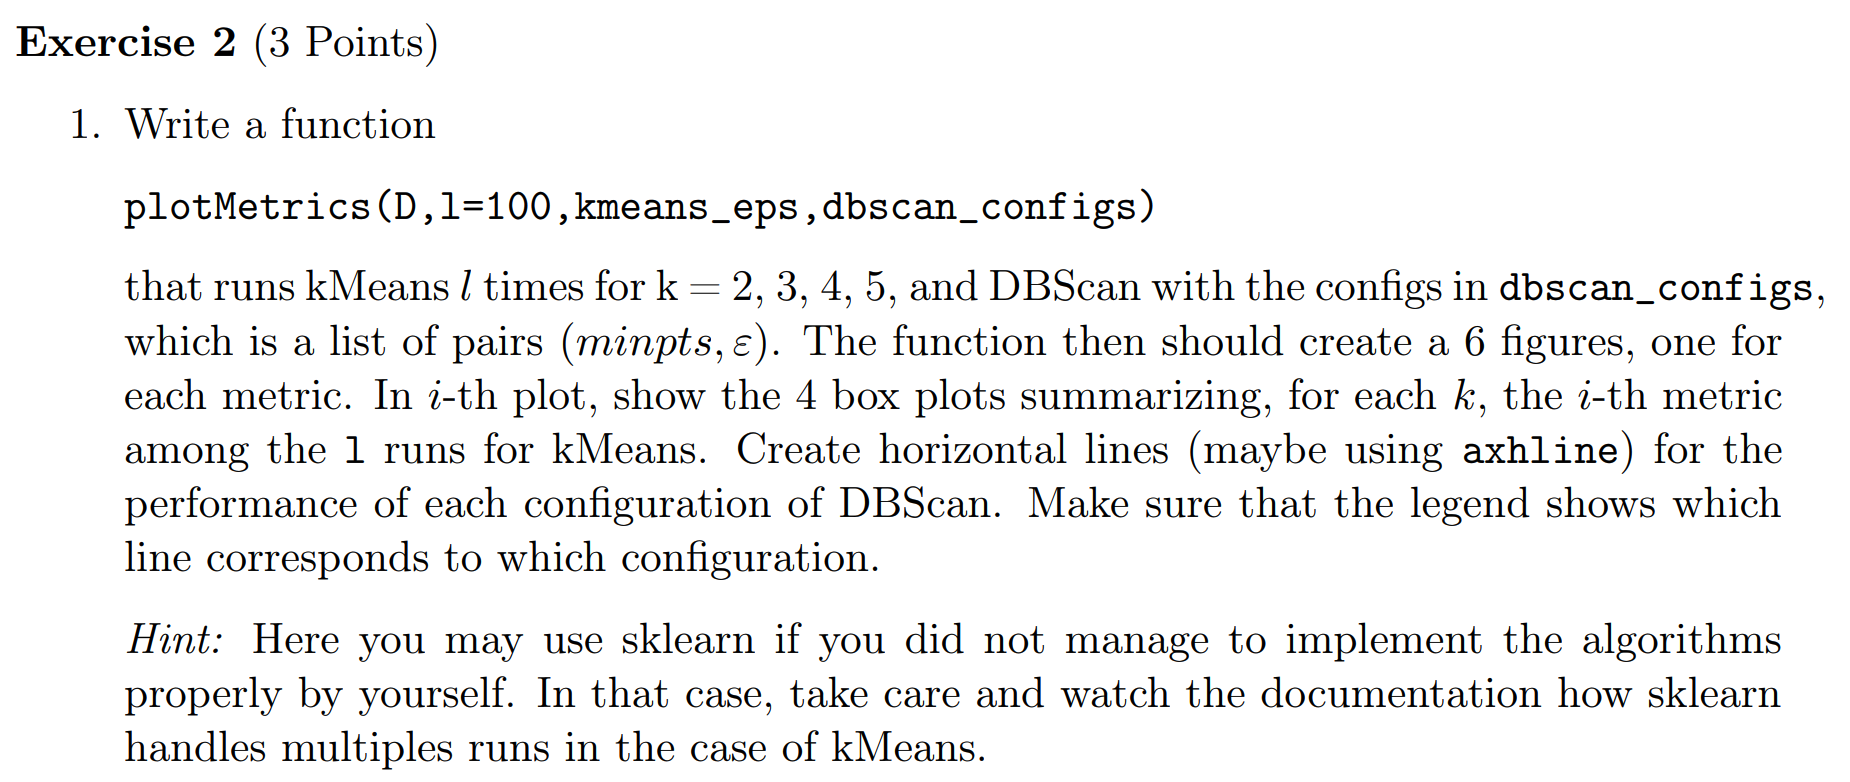

In [14]:
def plotMetrics(D, kmeans_eps, dbscan_configs, l=100):
    ks = [2, 3, 4, 5]
    metrics_names = ['beta', 'cindex', 'nc', 'dunn', 'db', 'sil']
    kmeans_metrics = {metric: [] for metric in metrics_names}
    dbscan_metrics = {metric: [] for metric in metrics_names}

    # Run kMeans for each k and collect metrics
    for k in ks:
        km_results = []
        for _ in range(l):
            kmeans = KMeans(n_clusters=k, tol=kmeans_eps, random_state=None).fit(D)
            labels = kmeans.labels_
            try:
                km_results.append([
                get_metric(D, labels, 'beta'),
                get_metric(D, labels, 'cindex'),
                get_metric(D, labels, 'nc'),
                get_metric(D, labels, 'dunn'),
                get_metric(D, labels, 'sil'),
                get_metric(D, labels, 'db')
                ])
            except:
                pass  # Evitar fallos si alguna métrica no se puede calcular
        # Store the results for this k
        for i, metric in enumerate(metrics_names):
            # Añadir solo si hay resultados válidos
            if km_results:
                kmeans_metrics[metric].append(np.array([run[i] for run in km_results]))

    # Run DBSCAN for each configuration and compute metrics
    for min_pts, eps in dbscan_configs:
        db_results = []
        dbscan = DBSCAN(min_samples=min_pts, eps=eps).fit(D)
        labels = dbscan.labels_
        if len(set(labels)) > 1:  # Check that DBSCAN found more than 1 cluster
            try:
                db_results.append([
                get_metric(D, labels, 'beta'),
                get_metric(D, labels, 'cindex'),
                get_metric(D, labels, 'nc'),
                get_metric(D, labels, 'dunn'),
                get_metric(D, labels, 'sil'),
                get_metric(D, labels, 'db')
              ])
            except:
                pass  # Evitar fallos si alguna métrica no se puede calcular
        # Store results
        for i, metric in enumerate(metrics_names):
            if db_results:
                dbscan_metrics[metric].append(np.mean([run[i] for run in db_results if run[i] is not None]))

    # Plot the results
    fig, axes = plt.subplots(1, len(metrics_names), figsize=(20, 10))
    for i, metric in enumerate(metrics_names):
        # Solo hacer el boxplot si hay datos para graficar
        if len(kmeans_metrics[metric]) == len(ks):
            axes[i].boxplot(kmeans_metrics[metric], positions=ks, widths=0.6)
        axes[i].set_title(f'{metric} (kMeans)')
        
        # Plot DBSCAN lines
        if len(dbscan_metrics[metric]) == len(dbscan_configs):
            for j, (min_pts, eps) in enumerate(dbscan_configs):
                axes[i].axhline(y=dbscan_metrics[metric][j], color=f'C{j}', linestyle='--', label=f'DBSCAN (minPts={min_pts}, eps={eps})')
        
        # Set axis labels and legends
        axes[i].set_xlabel('k')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

### 2.2
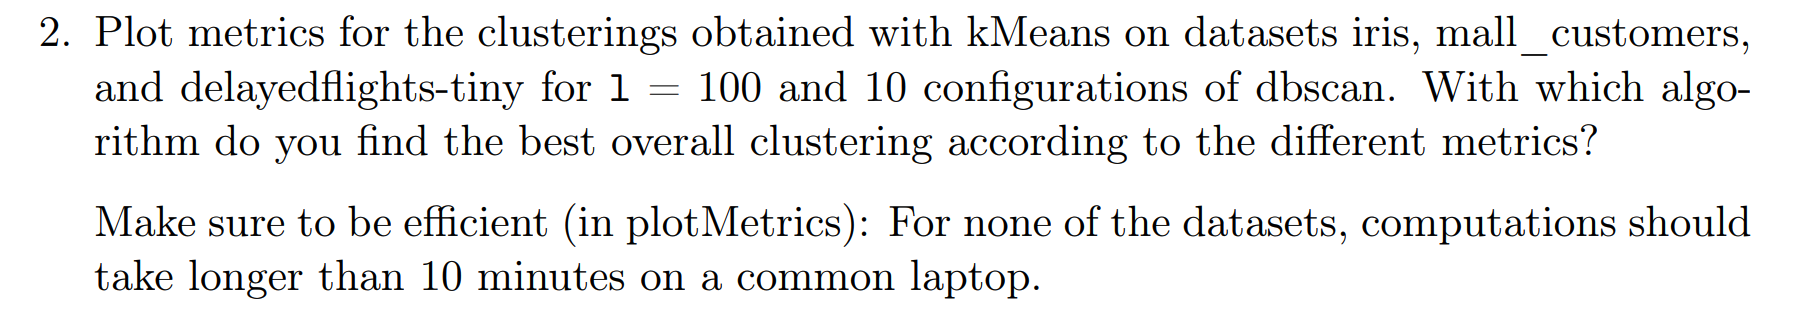

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mall_customers= pd.read_csv("https://raw.githubusercontent.com/softte-s/Datos_Hoja5/main/Mall_Customers%20(1).csv")
delayedflights = pd.read_csv("https://raw.githubusercontent.com/softte-s/Datos_Hoja5/main/delayedflights-tiny%20(1).csv")
iris = pd.read_csv("https://raw.githubusercontent.com/softte-s/Datos_Hoja5/main/iris%20(2).csv")

def aplicar_PCA (data):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)
  pca = PCA(n_components=2)
  data_pca = pca.fit_transform(data_scaled)
  return data_pca

mall_customers = mall_customers.drop(columns=["CustomerID", "Gender"])
mall_customers = aplicar_PCA(mall_customers)

delayedflights = delayedflights.select_dtypes(include=[np.number])
delayedflights = aplicar_PCA(delayedflights)

iris = iris.drop(columns=["species"])
iris = aplicar_PCA(iris)

dbscan_configs = [(5, 0.3), (5, 0.5), (10, 0.7), (15, 0.9), (20, 1.1), 
                  (5, 0.4), (10, 0.6), (15, 0.8), (20, 1.0), (25, 1.2)]

# Iris
plotMetrics(iris, kmeans_eps=0.0001, dbscan_configs=dbscan_configs, l=100)
#Mall customers
plotMetrics(mall_customers, kmeans_eps=0.0001, dbscan_configs=dbscan_configs, l=100)
#Delayed flights
plotMetrics(delayedflights, kmeans_eps=0.0001, dbscan_configs=dbscan_configs, l=100)